<a href="https://colab.research.google.com/github/joohoshin/TensorflowAI/blob/main/6_2_Pivot_table.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pivot_table

피벗테이블을 활용하면 테이터를 쉽게 정리할 수 있습니다. 
table = pd.pivot_table(df, values='D', index=['A', 'B'],
                    columns=['C'], aggfunc=np.sum)

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html

아파트 실거래가를 데이터를 정리해봅시다. 

http://rtdown.molit.go.kr/

In [ ]:
from google.colab import drive
drive.mount('/g')

Drive already mounted at /g; to attempt to forcibly remount, call drive.mount("/g", force_remount=True).


In [ ]:
import pandas as pd

# data 읽기
data = pd.read_csv('/g/My Drive/Tensorflow AI/아파트(매매)__실거래가_20210227120005.csv', encoding='cp949',
                   skiprows = 15)  #skiprows 옵션을 통해 불필요한 행을 건너뛸수 있습니다

In [ ]:
data

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일
0,강원도 강릉시 견소동,202,0202,0,송정한신,116.1750,202101,14,"22,300",3,1997,경강로2539번길 8,NaN
1,강원도 강릉시 견소동,202,0202,0,송정한신,59.8000,202101,15,"15,700",11,1997,경강로2539번길 8,NaN
2,강원도 강릉시 견소동,202,0202,0,송정한신,84.9450,202101,19,"18,250",12,1997,경강로2539번길 8,NaN
3,강원도 강릉시 견소동,202,0202,0,송정한신,84.9450,202101,19,"17,700",15,1997,경강로2539번길 8,NaN
4,강원도 강릉시 견소동,202,0202,0,송정한신,84.9450,202101,19,"17,400",11,1997,경강로2539번길 8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61209,충청북도 충주시 호암동,905,0905,0,호암동수채,84.9289,202101,8,"20,500",13,2007,호암중앙1로 47,NaN
61210,충청북도 충주시 호암동,905,0905,0,호암동수채,84.9254,202101,13,"19,700",6,2007,호암중앙1로 47,NaN
61211,충청북도 충주시 호암동,221-23,0221,23,호암리버빌(1단지),84.6800,202101,6,"16,500",8,2002,원호암5길 32,NaN
61212,충청북도 충주시 호암동,221-23,0221,23,호암리버빌(1단지),84.6800,202101,15,"16,500",7,2002,원호암5길 32,NaN


In [ ]:
data.columns

Index(['시군구', '번지', '본번', '부번', '단지명', '전용면적(㎡)', '계약년월', '계약일', '거래금액(만원)',
       '층', '건축년도', '도로명', '해제사유발생일'],
      dtype='object')

In [ ]:
# 연산을 위해 숫자형으로 되어 있는지 확인
data.dtypes

시군구          object
번지           object
본번           object
부번            int64
단지명          object
전용면적(㎡)     float64
계약년월          int64
계약일           int64
거래금액(만원)     object
층             int64
건축년도          int64
도로명          object
해제사유발생일     float64
dtype: object

df.str.replace를 통해 한번에 컬럼의 문자열을 변경할 수 있다

In [ ]:
# 문자로 인식된 것을 숫자로 바꾼다. 그러려면 ,를 먼저 삭제해야 한다
data['거래금액(만원)'] = data['거래금액(만원)'].str.replace(',','')   


In [ ]:
data['거래금액(만원)']

0        22300
1        15700
2        18250
3        17700
4        17400
         ...  
61209    20500
61210    19700
61211    16500
61212    16500
61213    17000
Name: 거래금액(만원), Length: 61214, dtype: object

astype()을 통해서 데이터 타입 변경이 가능하다

In [ ]:
data['거래금액(만원)'] = data['거래금액(만원)'].astype('int')

In [ ]:
# 비교를 위해 평당가격을 계산한다. 
df = data.assign(평당단가 = data['거래금액(만원)']/data['전용면적(㎡)'])

In [ ]:
df

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,평당단가
0,강원도 강릉시 견소동,202,0202,0,송정한신,116.1750,202101,14,22300,3,1997,경강로2539번길 8,NaN,191.951797
1,강원도 강릉시 견소동,202,0202,0,송정한신,59.8000,202101,15,15700,11,1997,경강로2539번길 8,NaN,262.541806
2,강원도 강릉시 견소동,202,0202,0,송정한신,84.9450,202101,19,18250,12,1997,경강로2539번길 8,NaN,214.844900
3,강원도 강릉시 견소동,202,0202,0,송정한신,84.9450,202101,19,17700,15,1997,경강로2539번길 8,NaN,208.370122
4,강원도 강릉시 견소동,202,0202,0,송정한신,84.9450,202101,19,17400,11,1997,경강로2539번길 8,NaN,204.838425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61209,충청북도 충주시 호암동,905,0905,0,호암동수채,84.9289,202101,8,20500,13,2007,호암중앙1로 47,NaN,241.378377
61210,충청북도 충주시 호암동,905,0905,0,호암동수채,84.9254,202101,13,19700,6,2007,호암중앙1로 47,NaN,231.968292
61211,충청북도 충주시 호암동,221-23,0221,23,호암리버빌(1단지),84.6800,202101,6,16500,8,2002,원호암5길 32,NaN,194.851205
61212,충청북도 충주시 호암동,221-23,0221,23,호암리버빌(1단지),84.6800,202101,15,16500,7,2002,원호암5길 32,NaN,194.851205


### 경기도 안양시 분석
* 지역 편차가 크므로 한개의 시에 대해서 아파트 가격 요인을 분석해봅시다

In [ ]:
df.시군구.unique()

array(['강원도 강릉시 견소동', '강원도 강릉시 교동', '강원도 강릉시 남문동', ..., '충청북도 충주시 지현동',
       '충청북도 충주시 칠금동', '충청북도 충주시 호암동'], dtype=object)

In [ ]:
# 안양시 선택
안양 = df.시군구.str.contains('안양')

In [ ]:
안양

0        False
1        False
2        False
3        False
4        False
         ...  
61209    False
61210    False
61211    False
61212    False
61213    False
Name: 시군구, Length: 61214, dtype: bool

In [ ]:
anyang_df = df[안양]

In [ ]:
anyang_df.head()

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,평당단가
13870,경기도 안양동안구 관양동,1453-13,1453,13,U-포그니,68.66,202101,16,45000,3,2017,관악대로360번길 28-16,NaN,655.403437
13871,경기도 안양동안구 관양동,1587,1587,0,공작럭키,49.80,202101,23,49900,3,1993,학의로 168,NaN,1002.008032
13872,경기도 안양동안구 관양동,1587-5,1587,5,공작성일,39.60,202101,6,30000,5,1993,달안로 153,NaN,757.575758
13873,경기도 안양동안구 관양동,1587-5,1587,5,공작성일,39.60,202101,9,28000,8,1993,달안로 153,NaN,707.070707
13874,경기도 안양동안구 관양동,1587-5,1587,5,공작성일,79.02,202101,16,70000,8,1993,달안로 153,NaN,885.851683


In [ ]:
# 경기도 안양시 이외에 안양이 들어간 곳이 있는 확인
anyang_df.시군구.unique()

array(['경기도 안양동안구 관양동', '경기도 안양동안구 비산동', '경기도 안양동안구 평촌동', '경기도 안양동안구 호계동',
       '경기도 안양만안구 박달동', '경기도 안양만안구 석수동', '경기도 안양만안구 안양동'], dtype=object)

In [ ]:
# 분석에 활용할 데이터만 선택
anyang_df = df.filter(['층','건축년도','전용면적(㎡)','평당단가'])

In [ ]:
anyang_df.head()

,층,건축년도,전용면적(㎡),평당단가
0,3,1997,116.175,191.951797
1,11,1997,59.800,262.541806
2,12,1997,84.945,214.844900
3,15,1997,84.945,208.370122
4,11,1997,84.945,204.838425


In [ ]:
anyang_df.dtypes

층            int64
건축년도         int64
전용면적(㎡)    float64
평당단가       float64
dtype: object

In [ ]:
anyang_df = anyang_df.astype({'층':'float', '건축년도':'int'})

In [ ]:
anyang_df.dtypes

층          float64
건축년도         int64
전용면적(㎡)    float64
평당단가       float64
dtype: object

In [ ]:
pivot = pd.pivot_table(anyang_df, values='평당단가', index=['건축년도'], aggfunc='mean')

In [ ]:
pivot

,평당단가
건축년도,
1962,239.286456
1969,235.910839
1971,1720.372618
1972,476.740518
1973,3526.292873
1974,1614.263693
1975,900.297161
1976,836.710843
1977,1447.395839


colab에서 한글 출력 해결

https://pinkwink.kr/1255

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


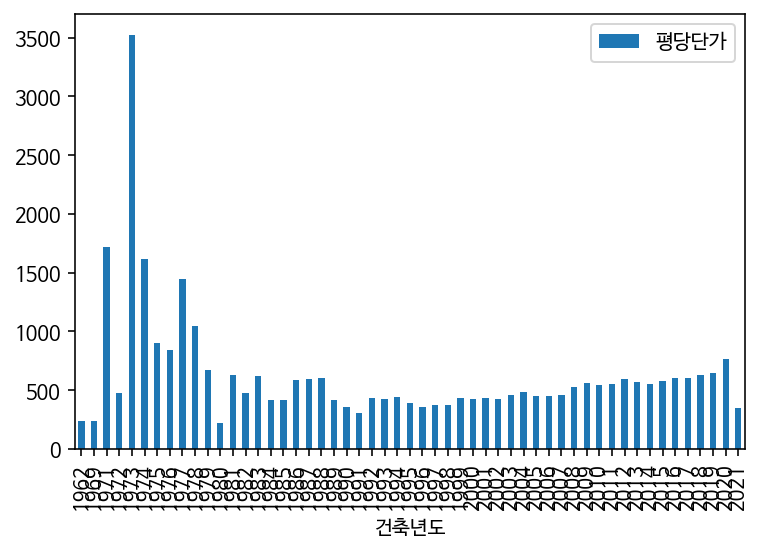

In [ ]:
pivot.plot.bar()

In [ ]:
#건축년도별 평균 단가를 확인해봅시다.

pivot2 = pd.pivot_table(anyang_df, values='평당단가', index=['건축년도'], columns=['층'], aggfunc='mean')

In [ ]:
pivot2

층,-1.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,53.0,54.0,55.0,56.0,59.0,60.0,61.0,69.0
건축년도,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1962,NaN,188.291515,160.697083,276.861019,287.403740,310.781078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1969,NaN,82.508251,405.482461,382.107704,115.511551,110.011001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1971,NaN,1362.312385,NaN,2064.047399,455.032120,1874.445964,1517.670231,1892.286748,1719.854768,NaN,NaN,NaN,2145.381121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972,NaN,NaN,133.451957,553.213909,NaN,NaN,NaN,NaN,NaN,257.108288,NaN,208.711434,1231.217003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1973,NaN,3433.730380,NaN,3476.986202,4001.116591,3532.434168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1974,NaN,1784.647321,681.279227,1840.735722,2592.673968,1500.913842,292.412402,1598.117952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975,NaN,708.876828,316.875428,910.176321,772.614405,377.564875,1887.208055,1780.104712,NaN,NaN,982.734532,964.230748,NaN,1833.578792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976,NaN,676.449735,728.256018,330.829836,366.418286,527.442194,1266.704346,NaN,2681.205857,1518.974730,2307.345154,NaN,1392.588083,NaN,NaN,2738.264580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1977,NaN,2137.976002,84.033613,1534.715605,740.357187,871.079867,2257.171087,2049.967969,NaN,1702.990986,109.475733,1969.959172,1416.383166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


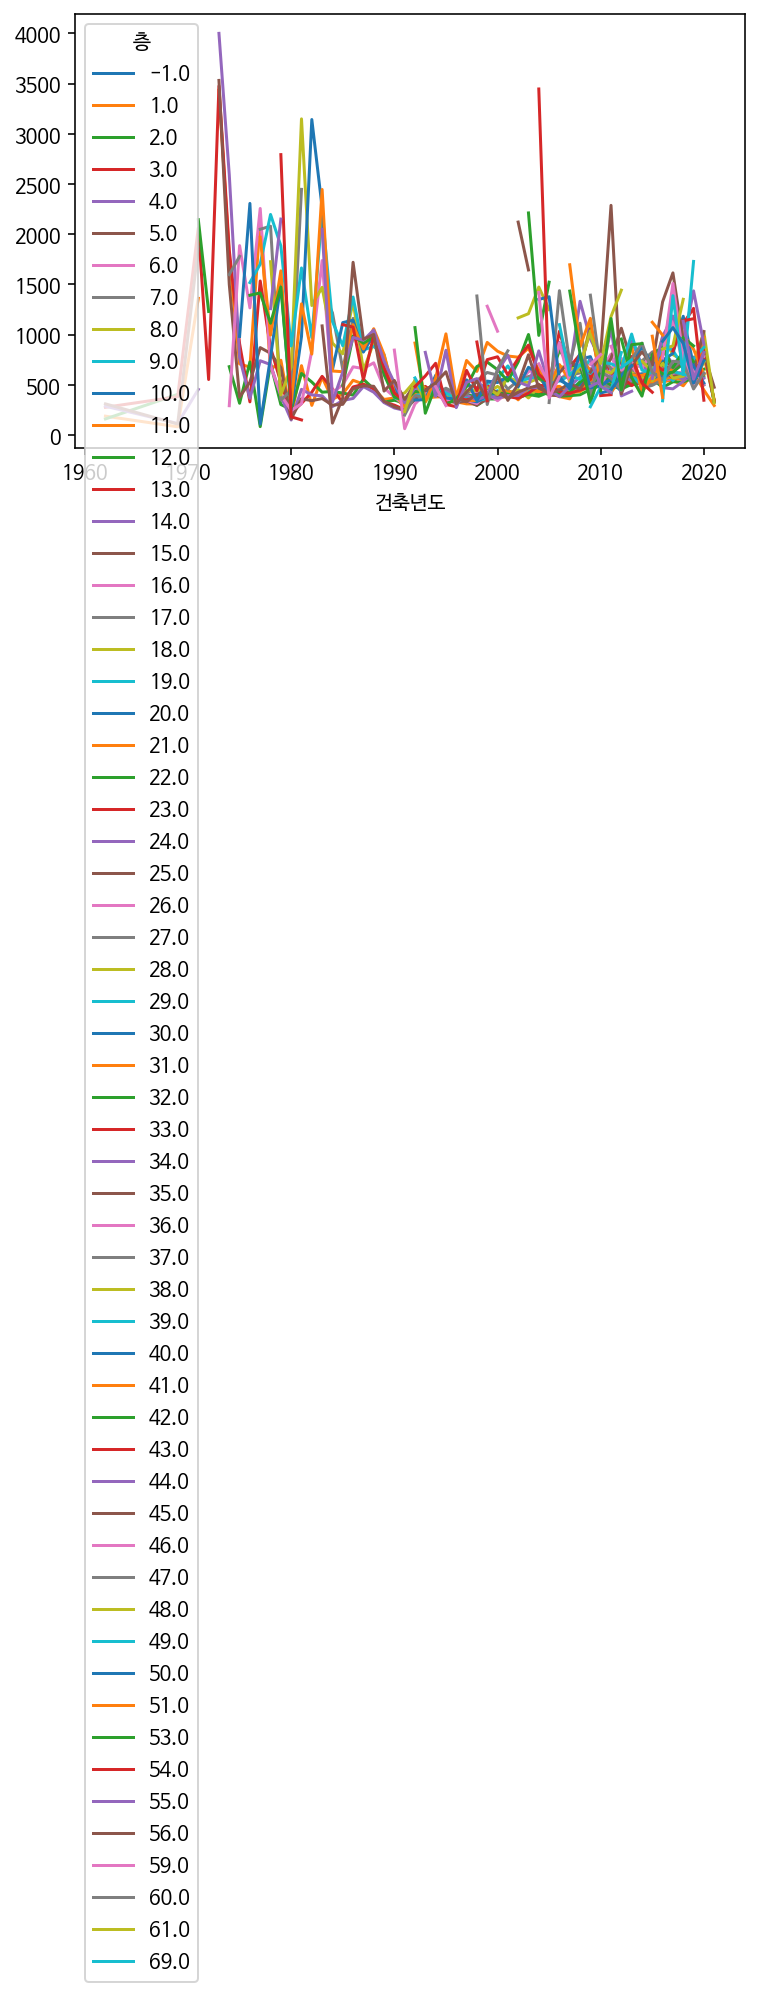

In [ ]:
pivot2.plot()

단지별로 가격을 알아봅시다

In [ ]:
pivot3 = pd.pivot_table(df, values='평당단가', index=['시군구','단지명'], aggfunc='mean')

In [ ]:
pivot3.head()

평당단가
시군구         단지명                        
강원도 강릉시 견소동 송정한신             233.646916
            송정해변신도브래뉴아파트     322.869311
강원도 강릉시 교동  강릉 교동 풍림아이원 아파트  439.135781
            강릉교동롯데캐슬1단지      307.931296
            강릉교동롯데캐슬2단지      429.485030

In [ ]:
# 가장 비싼 단지
pivot3.sort_values('평당단가', ascending= False)[:10]

평당단가
시군구            단지명                                 
서울특별시 서초구 반포동  반포 주공1단지                 3850.853697
서울특별시 서초구 잠원동  반포센트럴자이                  3834.931248
서울특별시 서초구 반포동  반포리체                     3800.443385
               아크로리버파크                  3670.246970
서울특별시 강남구 청담동  청담자이                     3617.638760
서울특별시 서초구 반포동  에이아이디차관주택                3526.410150
서울특별시 강남구 역삼동  래미안그레이튼(진달래2차)           3479.424557
서울특별시 서초구 반포동  반포써밋                     3468.046763
               반포 힐스테이트                 3408.018868
서울특별시 강남구 압구정동 현대14차(203,204,205,206동)  3400.800188

In [ ]:
# 가장 저렴한 단지
pivot3.sort_values('평당단가')[:10]

,,평당단가
시군구,단지명,
전라남도 고흥군 도화면 당오리,뉴코아,22.780717
경상북도 구미시 선산읍 교리,군영,25.062657
경상북도 김천시 부곡동,삼보전원,25.854879
전라남도 광양시 태인동,동광(부영),29.128673
전라북도 군산시 신풍동,월명,29.390618
경상북도 영주시 풍기읍 교촌리,동양가든,29.677113
경상북도 김천시 지좌동,덕일1,30.187160
전라북도 군산시 산북동,부향하나로1차,30.769231
경상북도 경주시 안강읍 산대리,삼홍,32.088307


In [ ]:
pivot3 = pivot3.sort_values('평당단가', ascending= False)

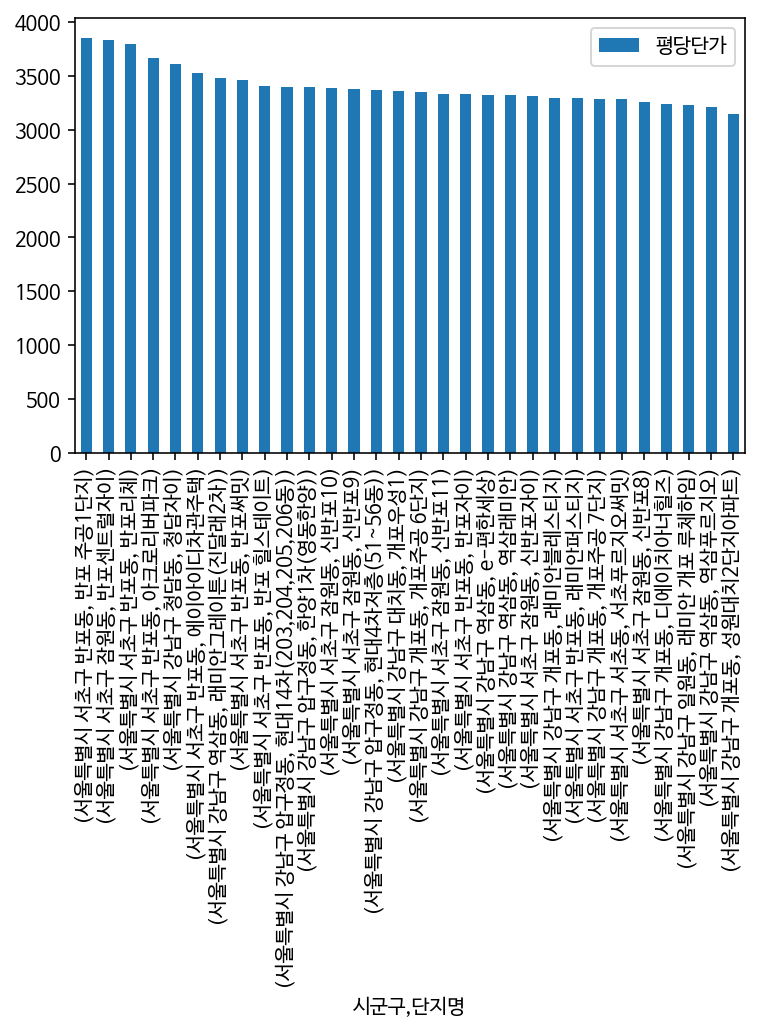

In [ ]:
pivot3[:30].plot.bar()